In [61]:
from common.DeepLab import *
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt
import sys

#Το GAP το χρησιμοποιώ σαν offset για να μην κολλάει το text στην εικόνα.
#Το SIZE είναι για το ImageFont.Ιδανικά θα μπορούσα σε περίπτωση που τα
#labels ήθελαν περισσότερο χώρο (>1 γραμμή), να αλλάζω GAP και SIZE και
#ανάλογα με το πόσες σειρές χρειάζομαι να κάνω h+lines*SIZE στην Image.new

GAP = 3
SIZE = 16

IMAGES = []

#LABEL_NAMES,FULL_LABEL_MAP,FULL_COLOR_MAP από demo
LABEL_NAMES = np.asarray([
	'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
	'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
	'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

In [62]:
#Η vis_segmentation τροποποιημένη.Αφαίρεσα ότι δεν χρειαζόταν.
def vis_segmentation(image, seg_map):
	seg_image = label_to_color_image(seg_map).astype(np.uint8)
	unique_labels = np.unique(seg_map)
	labels = LABEL_NAMES[unique_labels]
	colors = FULL_COLOR_MAP[unique_labels].astype(np.uint8)
	return [seg_image,labels,colors]

In [63]:
#Creates new image : Pastes the old one + extension (height) in order to draw the labels
#Image.new 	:	"RGB",size,color
#image.paste:	img,box (tuple size of 2-4),mask.
#				If tuple is (0,0), then its treated as upper left corner
#draw.text	:	((w,h),label,font,fill) , fill can be a tupple
# L = [seg_image,labels,colors]
def createImage(L,nameOfImage,original_im):
	offset = 0
	img = Image.fromarray(L[0]) 
	font = ImageFont.truetype("common/Arial-Bold.ttf",SIZE)
	w,h = img.size
	newImage = Image.new("RGB",(w,h+SIZE),"white")
	newImage.paste(img, (0, 0, w, h))
	draw = ImageDraw.Draw(newImage)
	#Draw Labels
	for i in range(len(L[1])):
		L[1][i] = L[1][i].upper()
		draw.text((offset,h+GAP),L[1][i], font = font, fill= tuple(L[2][i][0]))
		offset += font.getsize(L[1][i])[0]
	newImage.save(nameOfImage.rsplit(".")[0]+"-output."+nameOfImage.rsplit(".")[1])
	IMAGES.append([original_im,newImage])

In [64]:
#Η run_visualization θα μπορούσε να είναι και στην main.
def run_visualization(nameOfImage,MODEL):
	"""Inferences DeepLab model and visualizes result."""
	try:
		original_im = Image.open(nameOfImage)
	except IOError:
		print("Image with name "+nameOfImage+" not found!")
		return
	print("Running deeplab on image %s..." % nameOfImage)
	resized_im, seg_map = MODEL.run(original_im)
	returnList = vis_segmentation(resized_im, seg_map)
	createImage(returnList,nameOfImage,original_im)

Download completed! loading DeepLab model...
Model loaded successfully!
Running deeplab on image airplane.jpg...
Running deeplab on image athens.jpg...
Running deeplab on image eating.jpg...
Running deeplab on image familywithdogs.jpg...
Running deeplab on image syntagma.jpg...


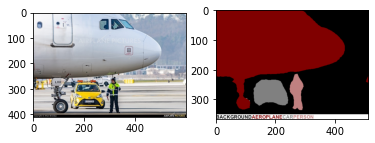

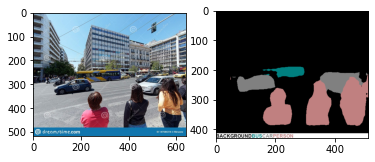

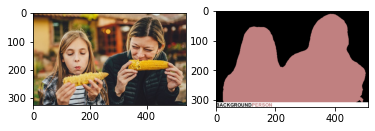

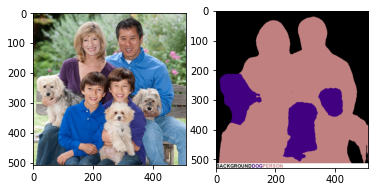

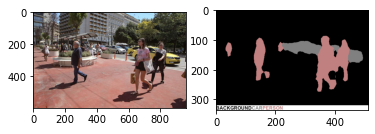

In [65]:
#Τρέχει με python first.py example1.jpg example2.jpg ...
#Λόγω χρήσης jupyter, έχω κάνει μία τροποποίηση μόνο για το presentation.
#Φτιάχνω την L εδώ για να τρέχει και για τις 5.
#Τα py αρχεία θα τρέχουν κανονικά για 1 εώς n εικόνες (βλ print("Run : .."))

if __name__ == "__main__":
	L = ["airplane.jpg","athens.jpg","eating.jpg","familywithdogs.jpg","syntagma.jpg"]
	if not L:
		print("Run : python first.py example1.jpg example2.jpg ...")
		exit(0)
	MODEL = getModel("mobilenetv2_coco_voctrainaug",'SemanticPredictions:0')
	for i in L:
		if os.path.isfile(i):
			run_visualization(i,MODEL)
	for i in IMAGES:
		plt.subplot(1, 2, 1)
		plt.imshow(i[0])
		plt.subplot(1, 2, 2)
		plt.imshow(i[1])
		plt.show()